### Introduction: 

In recent years, the financial landscape has seen a surge in alternative lending platforms aimed at connecting borrowers with potential investors. LendingClub.com stands out as a pioneer in this domain, facilitating loans between individuals seeking financial support (borrowers) and those seeking investment opportunities (investors). As investors, the key consideration lies in identifying borrowers with a high likelihood of fulfilling their financial obligations, thus ensuring a profitable and sustainable investment.

In our exploration, we delve into historical lending data spanning the years 2007 to 2010, a period preceding Lending Club's transition to a public entity. Our objective is clear: to develop a predictive model capable of discerning whether borrowers successfully repay their loans. This model holds immense value for investors, offering insights into borrower profiles and their corresponding repayment behaviors.

The dataset at hand encompasses various borrower attributes, ranging from credit policies and loan purposes to financial indicators such as interest rates, debt-to-income ratios, and credit scores. Leveraging machine learning techniques, particularly the Random Forest algorithm, we aim to harness the predictive power of these attributes to forecast loan repayment outcomes accurately.

Through this project, we aim not only to construct a robust predictive model but also to gain valuable insights into the underlying factors influencing borrower repayment behavior. By contextualizing our analysis within the tumultuous year of 2016, we seek to uncover patterns and trends that shed light on the dynamics of borrower-investor interactions during a pivotal period in Lending Club's history.

Here are what the columns represent:

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

## Get the Data



In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


info(), head(), and describe() methods on loans.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities.





Text(0.5, 0, 'FICO')

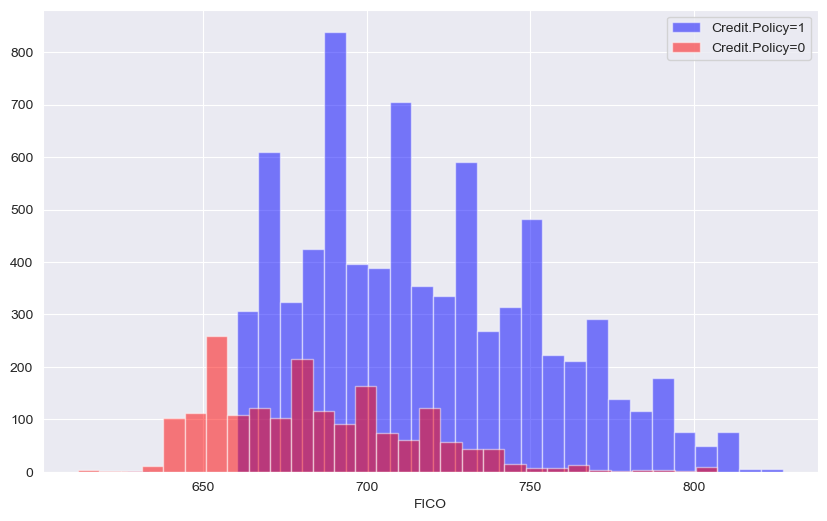

In [6]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

In [7]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Histogram of fully paid vs not fully paid on top of each other based on their credit score 

Text(0.5, 0, 'FICO')

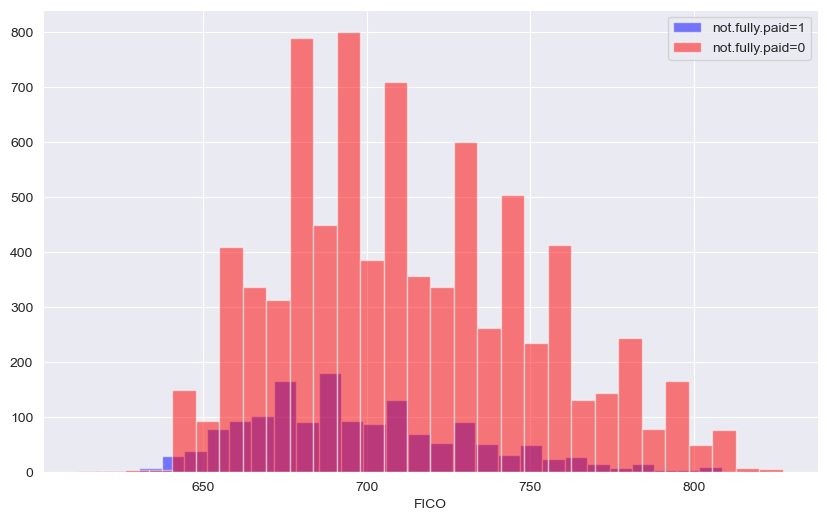

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Counting the purpose of loan, and visualizing each purpose catagory based on paid or not. 

<Axes: xlabel='purpose', ylabel='count'>

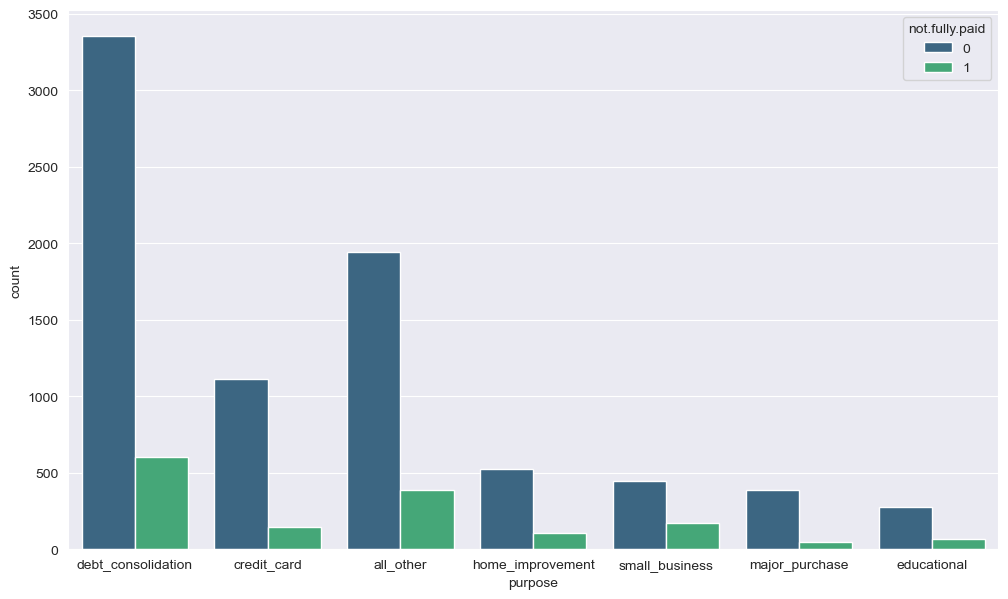

In [9]:
plt.figure(figsize =(12,7))
sns.set_style('darkgrid')
sns.countplot(df, x = 'purpose', hue = 'not.fully.paid', palette = 'viridis')

Relationship between fico score and interest rate via scatterplot. 

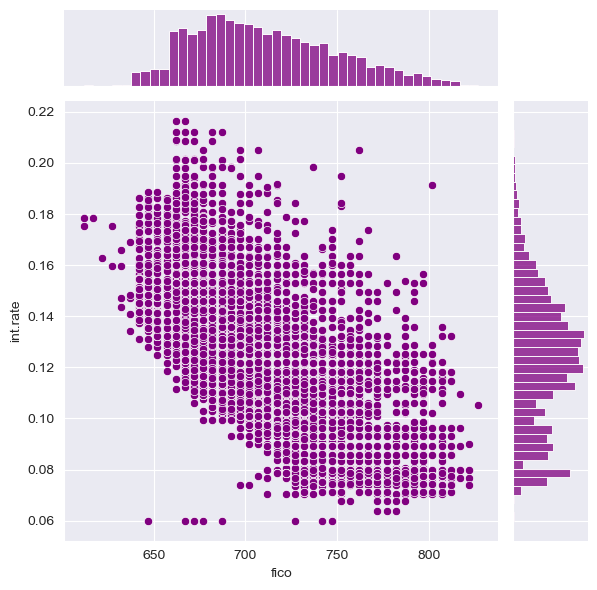

In [10]:
sns.jointplot(x = 'fico', y = 'int.rate', data = df, color = 'purple')

creating lmplot to see if there is a trend between fico score and interest rate based on if the amount was fully paid or not. 

In [11]:
import warnings
warnings.filterwarnings('ignore', category = UserWarning)

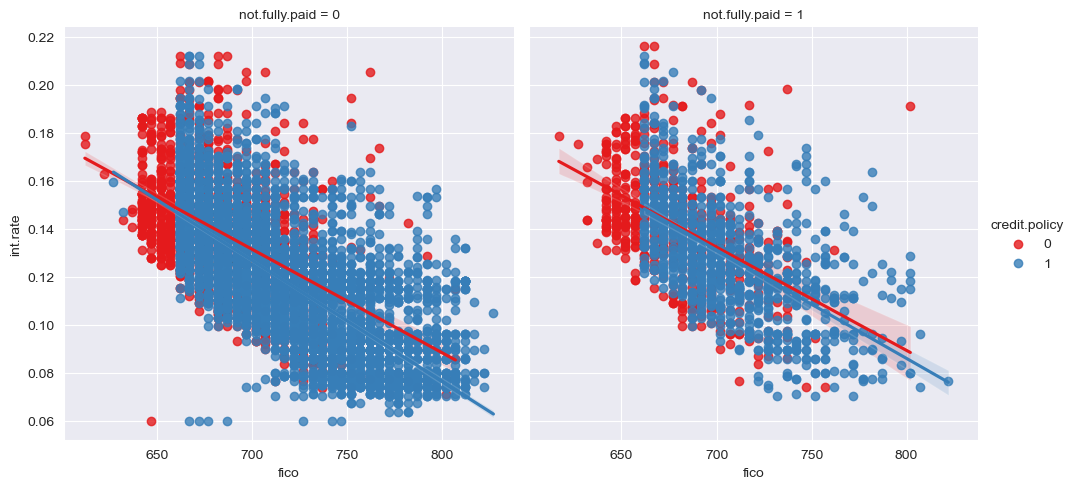

In [12]:
sns.lmplot(y = 'int.rate', x = 'fico', data = df, hue = 'credit.policy',
          col = 'not.fully.paid', palette = 'Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [14]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Categorical Features

since purpose column has catagorical features, we can change them into dummy varibles for random forest algorithm to understand.

In [15]:
catagorical = ['purpose']

In [16]:
catagorical

['purpose']

using pd.get_dummies to change categorical features to dummy variables for purpose column.

In [17]:
final_data = pd.get_dummies(data = df, columns = catagorical, drop_first = True)

In [18]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [19]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


## Train Test Split

Since our data is ready, we can start using Random forest algorithm to predict the chances of approval of loans. 

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

## Training a Decision Tree Model



In [22]:
from sklearn.tree import DecisionTreeClassifier

**Creating an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [23]:
dt = DecisionTreeClassifier()

In [24]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree


In [25]:
prediction = dt.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [28]:
print(confusion_matrix(y_test, prediction))

[[1991  440]
 [ 337  106]]


## Training the Random Forest model
Only using decision tree gave us accuracy of 73%, lets see if we can improve that by using random forest classifier. 


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.


In [32]:
forestpred = rf.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test, forestpred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2431
           1       0.50      0.03      0.06       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.49      2874
weighted avg       0.80      0.85      0.78      2874



**Show the Confusion Matrix for the predictions.**

In [35]:
print(confusion_matrix(y_test, forestpred))

[[2418   13]
 [ 430   13]]


We can cleary see that random forest performed better and was more accurate with accuracy score of 84% compared to accuracy of decision tree. 